<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Correlations" data-toc-modified-id="Correlations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Correlations</a></span></li><li><span><a href="#Exploratory-Models" data-toc-modified-id="Exploratory-Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Models</a></span></li></ul></div>

In this notebook correlation analysis is performed to help establish preliminary. Principle Component Analysis will also be employed to understand feature importance. Preliminary models are also calibrated to look at variable significance.

In [1]:
#import libraries
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#read in drug use dataset
df = pd.read_csv("../drug_consumption_cap_20230505.csv")
df

,ID,Age,Gender,Education,Country,Ethnicity,NEO_N,NEO_E,NEO_O,NEO_A,...,ECST,HEROIN,KETA,LEGALH,LSD,METH,MUSHRM,NICO,SEMER,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [3]:
#convert categorical drug levels with factorize (ignores order)
df.ECST.factorize()

(array([0, 1, 0, ..., 1, 3, 3], dtype=int64),
 Index(['CL0', 'CL4', 'CL1', 'CL3', 'CL2', 'CL6', 'CL5'], dtype='object'))

In [4]:
df.iloc[:,13:].apply(lambda x: pd.factorize(x)[0])

,ALC,AMPHET,AMYL,BENZOS,CAFF,CANNABIS,CHOC,COCAINE,CRACK,ECST,HEROIN,KETA,LEGALH,LSD,METH,MUSHRM,NICO,SEMER,VSA
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,1,1,1,0,1,0,1,0,1,1,0,1,0,0
2,1,1,0,1,0,2,2,0,0,0,0,0,0,0,0,1,2,0,0
3,2,1,0,2,1,3,2,2,0,0,0,1,0,0,0,0,0,0,0
4,2,2,2,1,0,2,1,0,0,2,0,0,1,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,0,1,0,1,2,6,2,0,0,0,0,0,3,3,0,0,2,0,5
1881,0,1,0,1,1,2,2,0,0,4,0,0,3,5,4,4,6,0,0
1882,2,6,4,5,0,5,1,6,0,1,0,1,0,1,0,2,3,0,0
1883,0,1,0,1,0,5,0,0,0,3,0,0,3,3,0,3,1,0,0


## Correlations

----------------------------------------ALC----------------------------------------


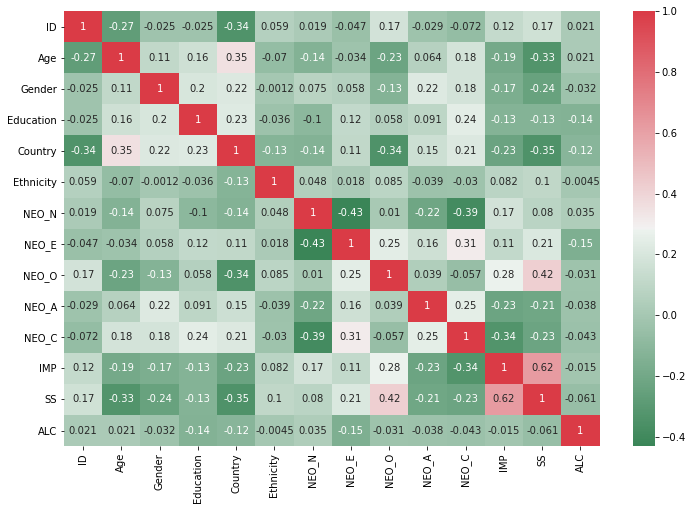

----------------------------------------AMPHET----------------------------------------


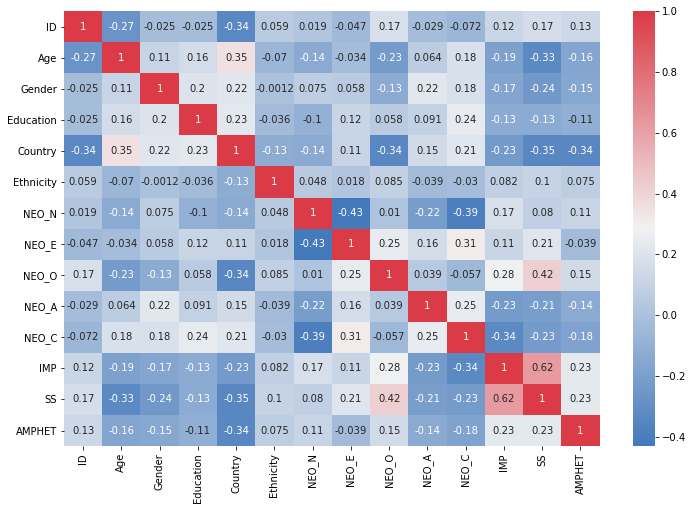

----------------------------------------AMYL----------------------------------------


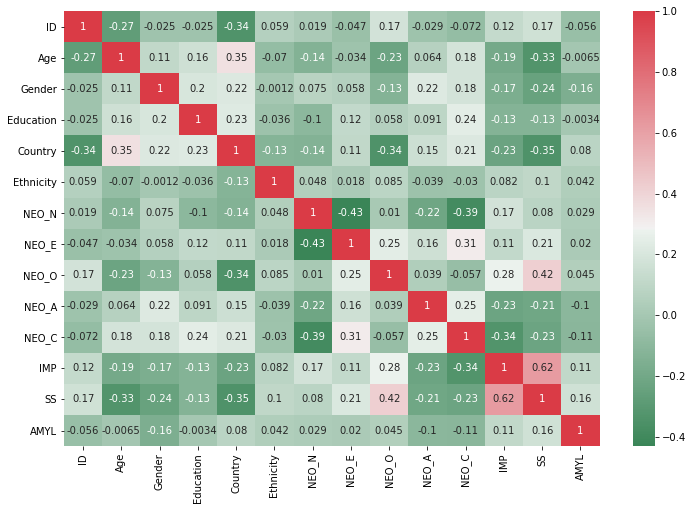

----------------------------------------BENZOS----------------------------------------


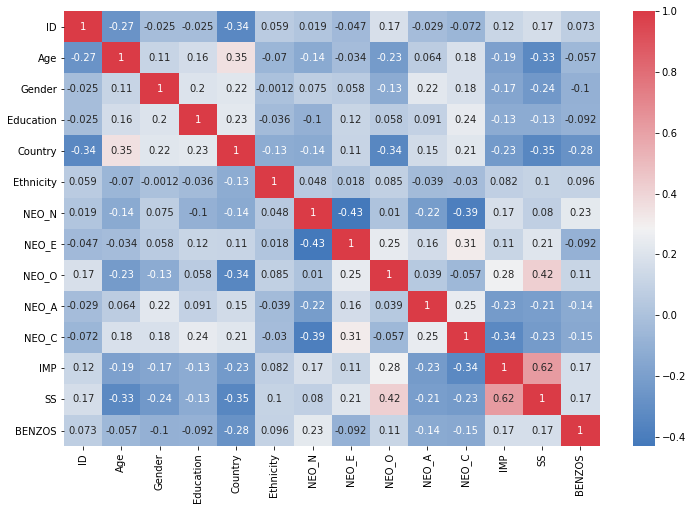

----------------------------------------CAFF----------------------------------------


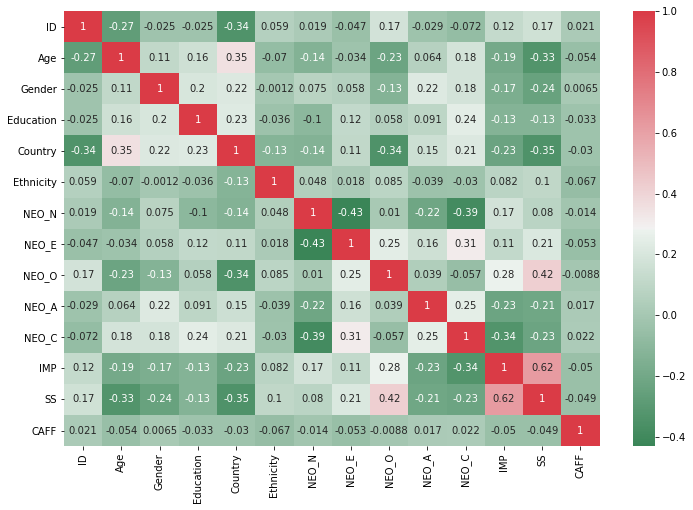

----------------------------------------CANNABIS----------------------------------------


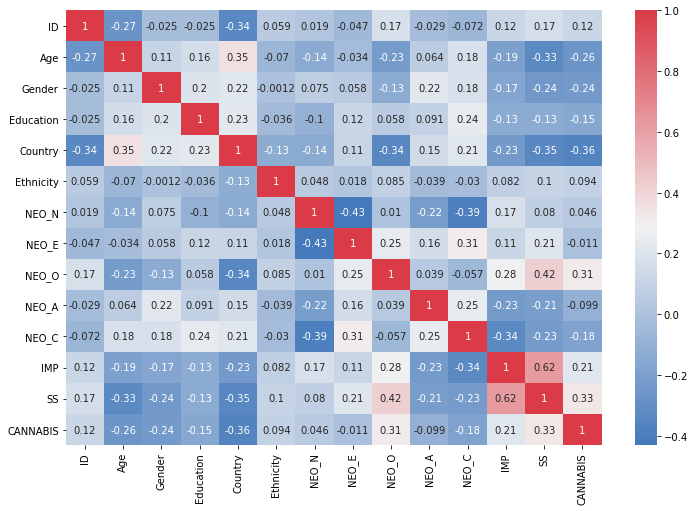

----------------------------------------CHOC----------------------------------------


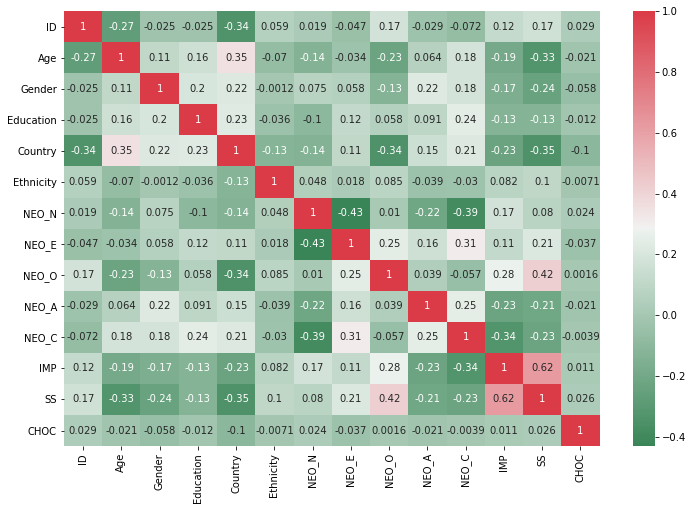

----------------------------------------COCAINE----------------------------------------


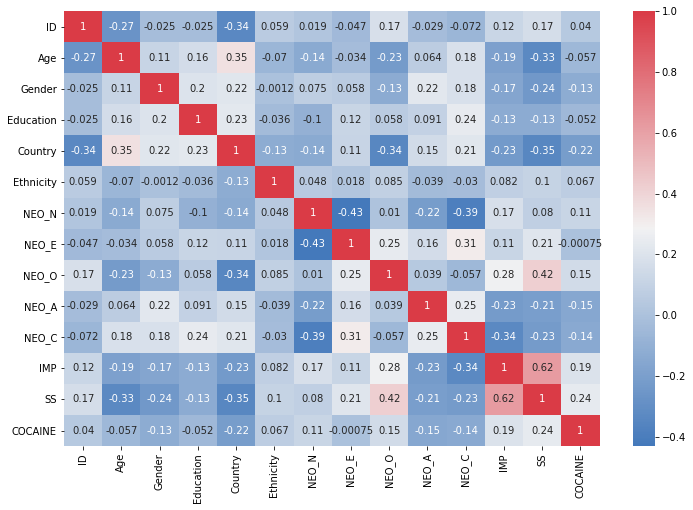

----------------------------------------CRACK----------------------------------------


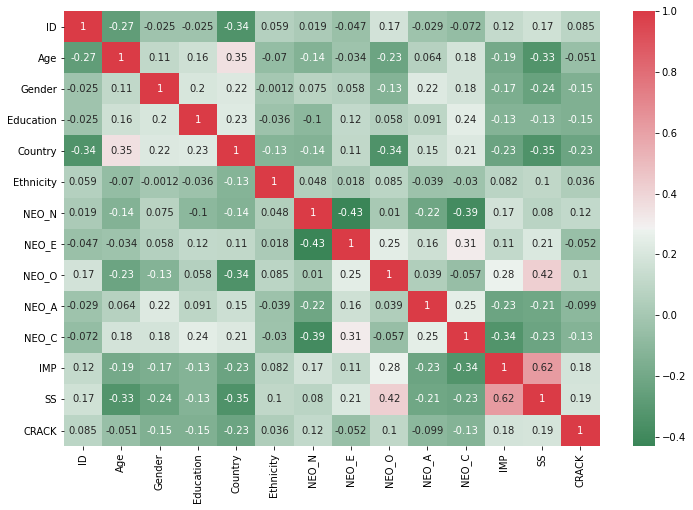

----------------------------------------ECST----------------------------------------


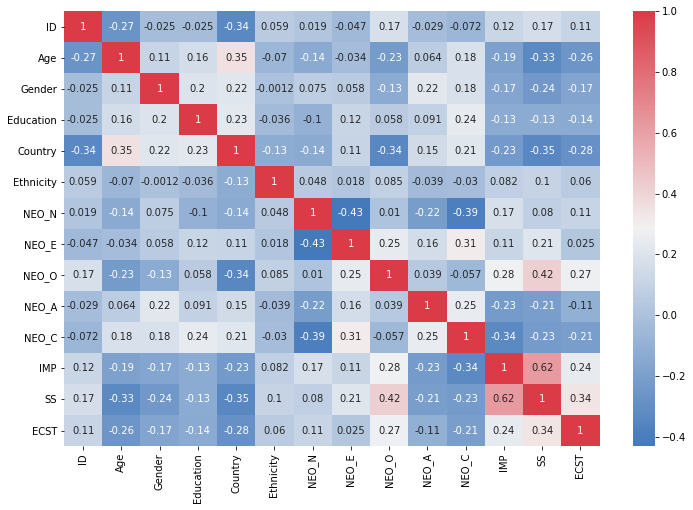

----------------------------------------HEROIN----------------------------------------


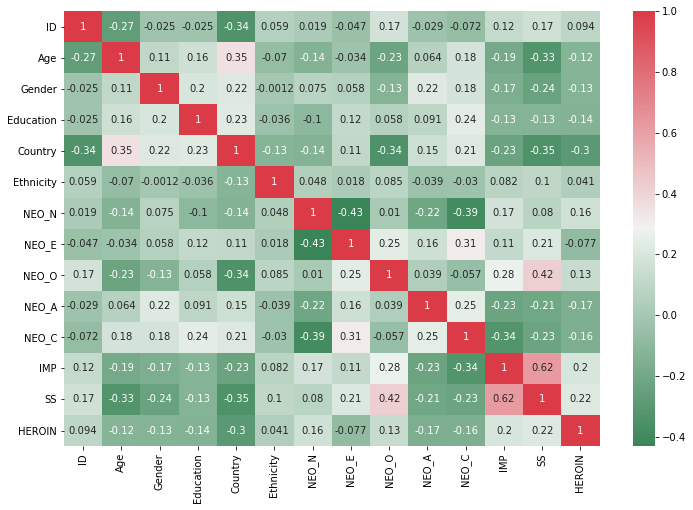

----------------------------------------KETA----------------------------------------


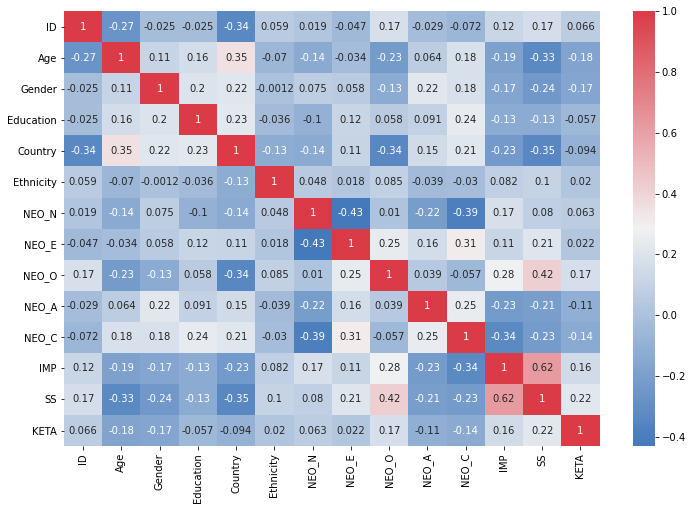

----------------------------------------LEGALH----------------------------------------


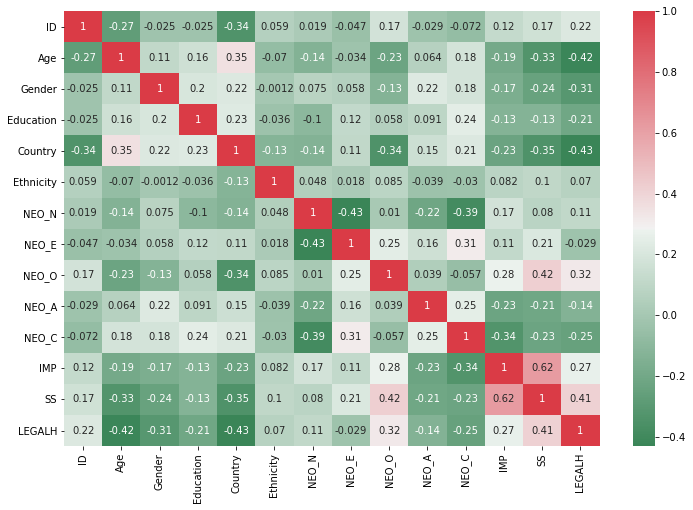

----------------------------------------LSD----------------------------------------


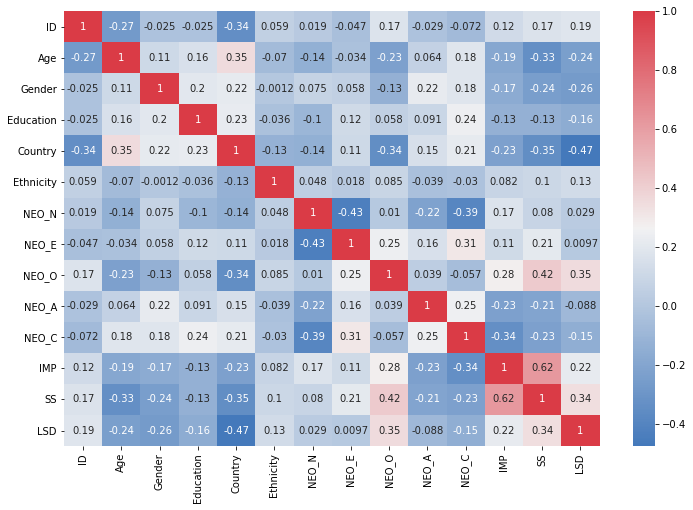

----------------------------------------METH----------------------------------------


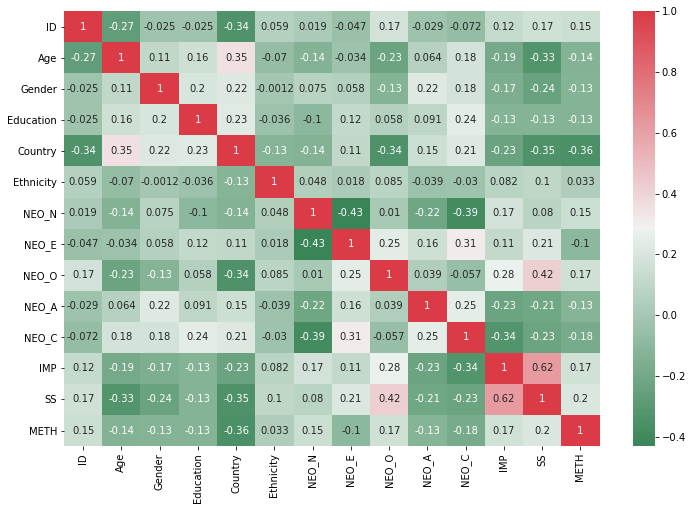

----------------------------------------MUSHRM----------------------------------------


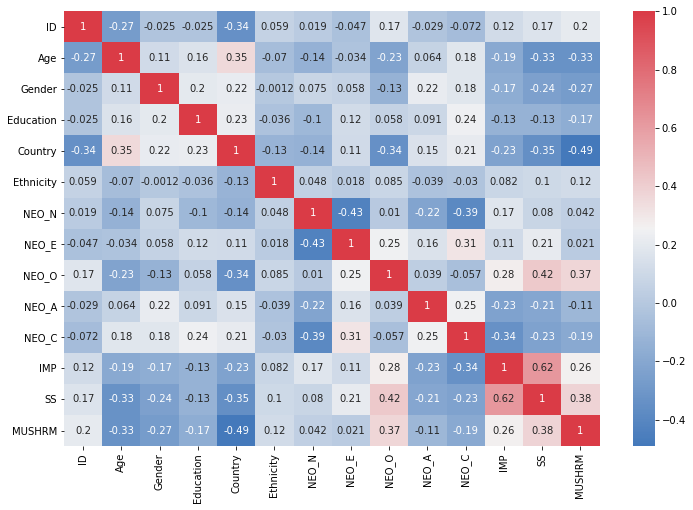

----------------------------------------NICO----------------------------------------


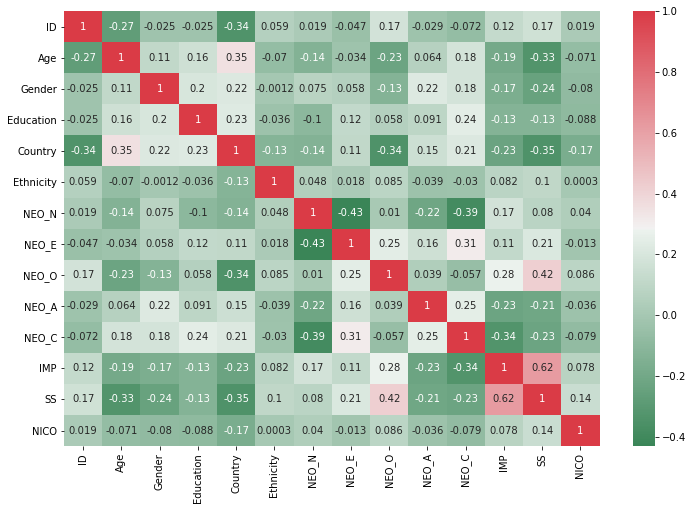

----------------------------------------SEMER----------------------------------------


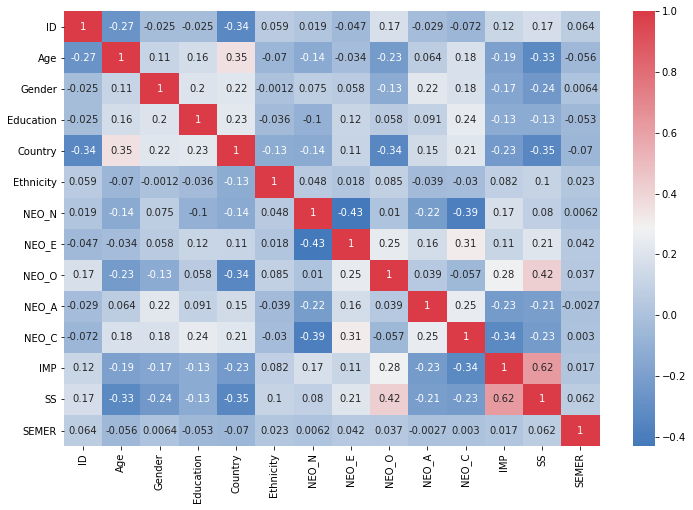

----------------------------------------VSA----------------------------------------


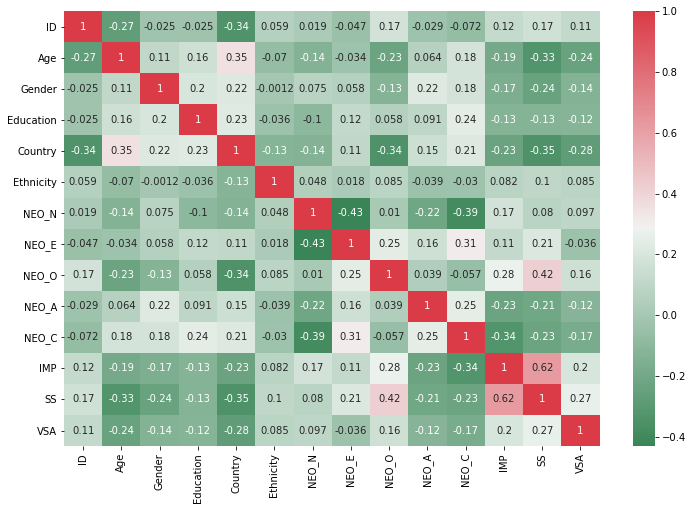

In [5]:
#generate correlation plots for every druge outcome vs all independent varibles

#select independent variables
x_vars = df.iloc[:,:13]
#select and factorize the drug outcome variables (all of which are categorical)
out = df.iloc[:,13:].apply(lambda x: pd.factorize(x)[0])

#iterate through each druge outcome
for i in range(len(out.columns)):
    #print drug name
    print(("-")*40+out.columns[i]+("-")*40)
    #concatenate with independent variables
    cor_df = pd.concat([x_vars,out.iloc[:,i]],axis =1)
    #set plot size
    fig, ax = plt.subplots(figsize=(12,8))
    #use if statement to colour and and even numbered plots differently to distinguish visually
    if i%2 == 0:
        
        #correlation plot with blue and read for even numbered plots
        cmap = sns.diverging_palette(500, 10, as_cmap=True)
        sns.heatmap(cor_df.corr(),cmap = cmap, annot=True, ax=ax)
        plt.show()
    
    else:
        
        #corellation plot with green and red for odd numbered plots
        cmap = sns.diverging_palette(250, 10, as_cmap=True)
        sns.heatmap(cor_df.corr(),cmap = cmap, annot=True, ax=ax)
        plt.show()
        


## Exploratory Models

In [6]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import numpy as np

In [7]:
#setup test train set
X_train, X_test, y_train, y_test = train_test_split(x_vars,out, test_size=.3, random_state=42)

In [8]:
y_train

,ALC,AMPHET,AMYL,BENZOS,CAFF,CANNABIS,CHOC,COCAINE,CRACK,ECST,HEROIN,KETA,LEGALH,LSD,METH,MUSHRM,NICO,SEMER,VSA
236,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0
551,3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
1760,2,3,1,2,3,1,2,0,0,1,0,2,3,3,1,2,5,0,4
865,1,3,0,1,0,5,2,0,0,5,0,0,3,0,0,0,3,0,0
208,2,2,2,1,0,5,0,6,0,3,0,2,3,1,0,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1,0,3,6,0,5,1,1,0,4,2,1,6,1,1,3,5,0,3
1294,2,3,0,2,3,5,1,1,3,3,3,1,3,3,1,3,6,0,0
860,1,0,1,0,3,5,2,6,2,4,0,1,2,4,5,2,1,0,0
1459,0,1,1,1,0,2,0,1,0,4,0,0,2,0,6,0,3,0,0


In [9]:
#instantiate logit
mnlogit = LogisticRegression(multi_class ='multinomial',fit_intercept = True , solver ='lbfgs').fit(X_train 
                                                                                                    , y_train["METH"])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
#score results with train set
mnlogit.score(X_train,y_train["METH"])

0.7642153146322972

In [11]:
#score results with test set
mnlogit.score(X_test,y_test["METH"])

0.7332155477031802

In [12]:
#instantiate SVC
lin_clf = svm.LinearSVC()

In [13]:
#fit with train data
SVC = lin_clf.fit(X_train,y_train["METH"])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [14]:
#score data
lin_clf.score(X_test,y_test["METH"])

0.7438162544169611

In [15]:
#examine decision function
SVC.decision_function([[0,1,0,0,0,0,0,0,0,0,0,0,0]])

array([[ 0.86430967, -1.38943785, -0.92191221, -1.42729158, -0.96882611,
        -0.90534714, -0.92552775]])

In [16]:
np.zeros((1,13))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [17]:
#set to dataframe
pd.DataFrame(SVC.decision_function(np.array(np.zeros(13),ndmin=2)))

,0,1,2,3,4,5,6
0,0.876832,-0.956434,-0.883104,-1.081709,-1.09504,-0.858886,-0.776714


In [18]:
y_train["METH"].value_counts()

0    1005
1     100
5      66
3      51
4      35
2      31
6      31
Name: METH, dtype: int64